# Exploratory Data Analysis
## CFPB Complaints

The purpose of this project is to download and explore a dataset using Python and associated libraries.

Exploratory analysis is usually undetaken without necessarily having any specific goals in mind or trying to solve a specific problem. However, having a few ideas or generating a few questions can be helpful in guiding along the exploratory process. These questions can evolve to be more specific or even chane as analysis is carried out.

For these project, I am exploring a dataset about consumer complaints of finacial products and services collected by the Consumer Financial Protection Bureau (CFPB). The data can be downloaded from the [data.gov](https://www.data.gov) website which hosts the U.S Government's open data.

### Import Libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import json
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.simplefilter('ignore')
pd.set_option('display.max_colwidth',1000) # Show complete text in dataframe without truncating.

### Gather

Downloaded dataset manually as a csv file and saved it locally as the file is too large and is causing app to crash when I download automatically using the requests library. (should check this out to see why)

In [3]:
# Read csv file into Pandas DataFrame.
complaints_df = pd.read_csv('Consumer_Complaints.csv', index_col=0, parse_dates=['Date received', 'Date sent to company'],\
            infer_datetime_format=True)


In [4]:
# Rename column and index names.
col_names = ['Product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip', 'tags', 'consumer_consent_provided?',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response?', 'consumer_disputed?', 'complaint_ID']

complaints_df.columns = col_names
complaints_df.index.name = 'date_received'

In [5]:
complaints_df.shape # Dataframe has 17 columns and 932,473 rows.

(932473, 17)

In [6]:
complaints_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 932473 entries, 2014-03-12 to 2016-08-19
Data columns (total 17 columns):
Product                         932473 non-null object
sub_product                     697303 non-null object
issue                           932473 non-null object
sub_issue                       450184 non-null object
consumer_complaint_narrative    227328 non-null object
company_public_response         271533 non-null object
company                         932473 non-null object
state                           922555 non-null object
zip                             918556 non-null object
tags                            129864 non-null object
consumer_consent_provided?      410778 non-null object
submitted_via                   932473 non-null object
date_sent_to_company            932473 non-null datetime64[ns]
company_response_to_consumer    932473 non-null object
timely_response?                932473 non-null object
consumer_disputed?              768570 n

In [7]:
complaints_df.index

DatetimeIndex(['2014-03-12', '2016-10-01', '2016-10-17', '2014-06-08',
               '2014-09-13', '2013-11-13', '2015-06-16', '2015-06-15',
               '2015-11-13', '2014-10-21',
               ...
               '2015-09-17', '2014-02-11', '2016-11-09', '2016-01-22',
               '2017-01-26', '2017-04-10', '2017-02-07', '2017-01-04',
               '2015-09-28', '2016-08-19'],
              dtype='datetime64[ns]', name='date_received', length=932473, freq=None)

In [8]:
complaints_df.sample(5)

,Product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip,tags,consumer_consent_provided?,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response?,consumer_disputed?,complaint_ID
date_received,,,,,,,,,,,,,,,,,
2017-04-26,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't recognize,Refuses to remove all inquiries. I have contacted the credit bureau multiple times explaining that I have contacted the furnishers of information they are reporting inquiries from and I have been able to get no where. I have not been able to get any factual evidence showing that the inquiries reported are mine. The credit bureau agency claims that they have validated the inquiries are factual. How can they determine something is factual when I can not?,Company has responded to the consumer and the CFPB and chooses not to provide a public response,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NM,871XX,NaN,Consent provided,Web,2017-04-26,Closed with explanation,Yes,NaN,2466929
2012-02-27,Credit card,NaN,APR or interest rate,NaN,NaN,NaN,JPMORGAN CHASE & CO.,FL,32225,Older American,NaN,Web,2012-02-28,Closed with relief,Yes,No,27106
2017-01-19,Credit reporting,NaN,Incorrect information on credit report,Public record,NaN,NaN,"EQUIFAX, INC.",GA,31407,NaN,Consent not provided,Web,2017-01-19,Closed with explanation,Yes,No,2298585
2012-11-14,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,91791,NaN,NaN,Referral,2012-11-16,Closed with explanation,Yes,No,190675
2014-04-10,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt was paid,NaN,NaN,"Dynamic Recovery Solutions, LLC",CA,91381,"Older American, Servicemember",NaN,Web,2014-04-10,Closed with explanation,Yes,No,803526


In [34]:
complaints_df.isnull().sum()

Product                              0
sub_product                     235170
issue                                0
sub_issue                       482289
consumer_complaint_narrative    705145
company_public_response         660940
company                              0
state                             9918
zip                              13917
tags                            802609
consumer_consent_provided?      521695
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response?                     0
consumer_disputed?              163903
complaint_ID                         0
dtype: int64

By looking at the data, I came up with a few questions of interest that I would like to see whether I can answer as I do exploratory analysis. Having a few questions about the data can help guide the exploratory process a bit. Below are a few questions I would like to answer.

1. What is the average or median number of complaints by company?
2. Which companies have the most complaints lodges against them? 
3. How are complaints by geographical regions? E.g by state or by zip code? Also take population of region into account.
4. Summary of complaints grouped by product and sub-product categories.
5. How many companies reply in a timely fashion to complaints? Does category matter?


### Complaints by Category and Subcategory

In [9]:
products = pd.DataFrame(complaints_df.Product.value_counts().reset_index())
products.columns = ['product', 'complaints']
products.count()

product       18
complaints    18
dtype: int64

Text(0.5,1,'Product Complaints')

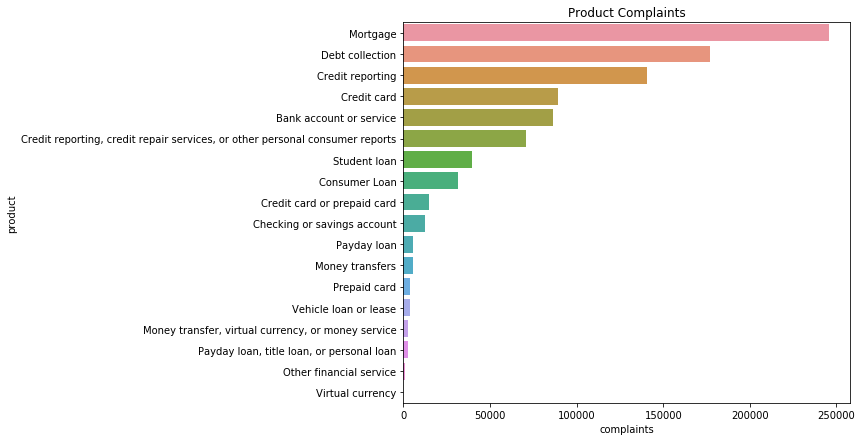

In [10]:
plt.figure(figsize=(8, 7))
sns.barplot(x='complaints', y='product', data=products)
plt.title('Product Complaints')

Grouping the complaints by product, we can see that most complaints are about Mortgages, with debt collection and credit reporting taking 2nd and 3rd place respectively.

Complaints are then further divided into sub_products. Debt collection is further subdivided into 17 sub_product categories while Credit reporting, Payday loan, and Credit card categories have no further sub-categories.

In [11]:
complaints_df.groupby('Product')['sub_product'].nunique().sort_values(ascending=False)

Product
Debt collection                                                                 17
Mortgage                                                                        11
Money transfer, virtual currency, or money service                              10
Prepaid card                                                                     9
Other financial service                                                          7
Consumer Loan                                                                    6
Credit card or prepaid card                                                      6
Checking or savings account                                                      5
Bank account or service                                                          5
Payday loan, title loan, or personal loan                                        5
Vehicle loan or lease                                                            3
Credit reporting, credit repair services, or other personal consumer reports   

In [12]:
def sub_products(product):
    '''Filter dataframe by product and return sub_products with value counts for specified product.'''
    filtered = complaints_df.loc[complaints_df['Product'] == product]
    return filtered['sub_product'].value_counts()

In [13]:
mortgages = sub_products('Mortgage')
print(mortgages)

Other mortgage                                86637
Conventional fixed mortgage                   70617
FHA mortgage                                  27011
Conventional adjustable mortgage (ARM)        25382
Home equity loan or line of credit            11626
Conventional home mortgage                     9935
VA mortgage                                    5928
Other type of mortgage                         3994
Reverse mortgage                               2396
Home equity loan or line of credit (HELOC)     1257
Second mortgage                                 662
Name: sub_product, dtype: int64


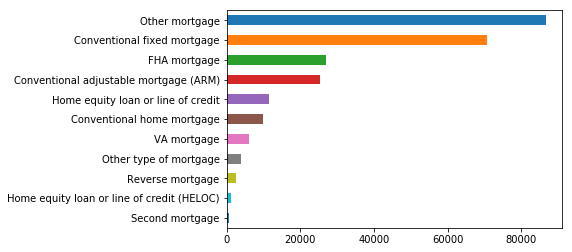

In [14]:
mortgages.plot.barh()
plt.gca().invert_yaxis()
plt.show()

Student Loans are further subdivided into three subcategories.

In [15]:
sub_products('Student loan')

Non-federal student loan          22283
Federal student loan servicing    14591
Private student loan               2793
Name: sub_product, dtype: int64

### Complaints by Company

In [16]:
complaints_df['company'].describe()

count            932473
unique             4580
top       EQUIFAX, INC.
freq              73490
Name: company, dtype: object

In [17]:
# Top 10 companies by complaints.
complaints_df.company.value_counts().head(20)

EQUIFAX, INC.                             73490
BANK OF AMERICA, NATIONAL ASSOCIATION     71552
Experian Information Solutions Inc.       61988
WELLS FARGO & COMPANY                     59362
TRANSUNION INTERMEDIATE HOLDINGS, INC.    56546
JPMORGAN CHASE & CO.                      48301
CITIBANK, N.A.                            39259
OCWEN LOAN SERVICING LLC                  25727
CAPITAL ONE FINANCIAL CORPORATION         24353
Navient Solutions, LLC.                   22457
NATIONSTAR MORTGAGE                       17823
SYNCHRONY FINANCIAL                       15581
U.S. BANCORP                              13952
Ditech Financial LLC                      12525
AMERICAN EXPRESS COMPANY                   9849
PNC Bank N.A.                              9618
ENCORE CAPITAL GROUP INC.                  8952
DISCOVER BANK                              7634
HSBC NORTH AMERICA HOLDINGS INC.           7606
SUNTRUST BANKS, INC.                       7031
Name: company, dtype: int64

In [18]:
co_complaints = pd.DataFrame(complaints_df.company.value_counts())
co_complaints.columns = ['num_complaints']
stats = co_complaints.describe()
print(stats)

       num_complaints
count     4580.000000
mean       203.596725
std       2493.936476
min          1.000000
25%          2.000000
50%          6.000000
75%         27.000000
max      73490.000000


Here, I grouped the complaints by company and calculated summary statistics such as mean, standard deviation among others. There are **4580 unique** companies in the complaints data.  

The big difference between the mean and median complaints, 203 and 6 respectively, shows that the complaints are heavily skewed to the right. A majority of companies have very few complaints lodged against them while a few companies have a lot of complaints against them.

By taking the log of complaints, we get a better view of distribution of complaints as seen in the plots below. The second subplots is a histogram of the log of complaints.

In [19]:
co_complaints_log = np.log(co_complaints)

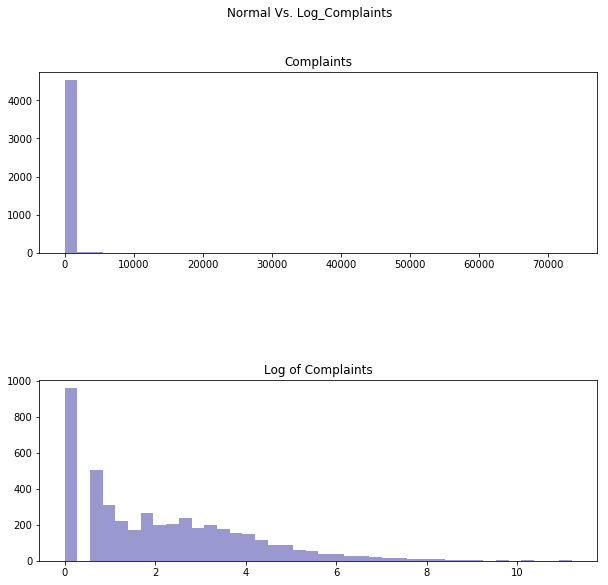

In [20]:
fig, axes = plt.subplots(figsize=(10,9), ncols=1, nrows=2)
plt.subplots_adjust(hspace=0.7) # Vertical space between subplots.
plt.suptitle('Normal Vs. Log_Complaints') # Overall plot title.

sns.distplot(co_complaints, bins=40, kde=False, ax=axes[0], color='darkblue')
sns.distplot(co_complaints_log, bins=40, kde=False, ax=axes[1], color='darkblue')

axes[0].set_title('Complaints') # Title for 1st subplot
axes[1].set_title('Log of Complaints') #Title for 2nd subplot

plt.show()

### Binning

In [21]:
# Group by number of complaints for each company.
bins = [0, 1, 10, 100, 1000, 10000, 100000]
labels = ['1', '1-10', '10-100', '100-1000', '1000-10000','>10000' ]
binned_df = pd.cut(co_complaints.num_complaints, bins, labels=labels).value_counts().sort_index()

In [22]:
binned_df

1              958
1-10          1762
10-100        1376
100-1000       391
1000-10000      79
>10000          14
Name: num_complaints, dtype: int64

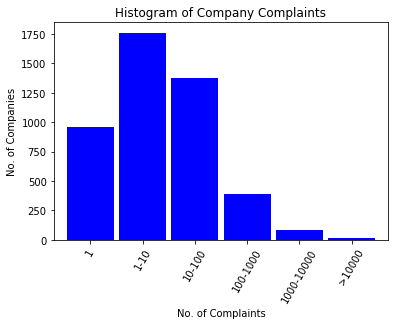

In [23]:
binned_df.plot.bar(facecolor='blue', width=0.9)
plt.xlabel('No. of Complaints')
plt.ylabel('No. of Companies')
plt.title('Histogram of Company Complaints')
plt.xticks(rotation=60)
plt.show()

### Company Search

In [24]:
def company_search(company_name):
    ''' 
    Function to return companies with names similarto input.
    For searching company names in the dataframe.
    '''
    company_list = set()
    for company in complaints_df.company:
        if company_name.lower() in company.lower():
            company_list.add(company)
        else:
            continue
    if len(company_list) == 0:
        return ('No companies that match input found.')
    
    return list(enumerate(list(company_list), 1))

In [25]:
company_search('goldman')

[(1, 'Russell P Goldman PC'),
 (2, 'Goldman, Imani & Goldberg, Inc'),
 (3, 'Fitzgerald Goldman & Associates, Inc.'),
 (4, 'GOLDMAN SACHS BANK USA'),
 (5, 'Scott and Goldman, Inc.')]

In [26]:
def complaints_co_x(name):
    ''' 
    Return number of complaints for any company in the dataset.
    Company name has to be in dataframe and has to be exact.
    '''
    count = complaints_df[complaints_df.company == name].complaint_ID.count()
    products = complaints_df[complaints_df.company == name].Product.nunique()
    return ('{} has {} complaint(s) in {} product categories.').format(name, count, products)

In [27]:
complaints_co_x('GRANITE STATE MANAGEMENT & RESOURCES')

'GRANITE STATE MANAGEMENT & RESOURCES has 59 complaint(s) in 3 product categories.'

In [28]:
complaints_co_x('GOLDMAN SACHS BANK USA')

'GOLDMAN SACHS BANK USA has 139 complaint(s) in 13 product categories.'

In [29]:
complaints_df[complaints_df.company == "GOLDMAN SACHS BANK USA"].Product.value_counts()

Bank account or service                                                         45
Mortgage                                                                        43
Checking or savings account                                                     17
Consumer Loan                                                                   12
Payday loan, title loan, or personal loan                                        6
Credit reporting, credit repair services, or other personal consumer reports     5
Payday loan                                                                      4
Money transfers                                                                  2
Credit card or prepaid card                                                      1
Debt collection                                                                  1
Credit reporting                                                                 1
Prepaid card                                                                     1
Cred

### Complaints by State


`complaints_df.state.nunique()` shows there are 62 unique states in the complaints dataset.

Number of complaints by state probaly correlates with population thus this number does not tell much by itself.

Text(0,0.5,'No. of Complaints')

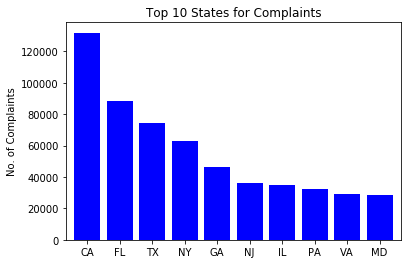

In [30]:
top_10_states = complaints_df.state.value_counts()[:10]
top_10_states.plot(kind='bar', color='blue', width=0.8)
plt.xticks(rotation=0)
plt.title("Top 10 States for Complaints")
plt.ylabel("No. of Complaints")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

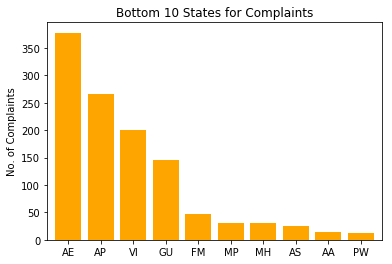

In [31]:
bottom_10_states = complaints_df.state.value_counts()[-10:]
bottom_10_states.plot(kind='bar', color='orange', width=0.8)
plt.title("Bottom 10 States for Complaints")
plt.ylabel("No. of Complaints")
plt.xticks(rotation=0)

In [32]:
by_state = complaints_df.groupby('state')